In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [4]:
sales_of_company_x['Count'] = sales_of_company_x['Count'][~(sales_of_company_x['Count'].isnull())]
robberies_in_boston['Count'] = robberies_in_boston['Count'][~(robberies_in_boston['Count'].isnull())]
airlines_passengers['Count'] = airlines_passengers['Count'][~(airlines_passengers['Count'].isnull())]
mean_monthly_temp['Deg'] = mean_monthly_temp['Deg'][~(mean_monthly_temp['Deg'].isnull())]
dowjones_closing['Close'] = dowjones_closing['Close'][~(dowjones_closing['Close'].isnull())]
female_births['Count'] = female_births['Count'][~(female_births['Count'].isnull())]

all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [8]:
import numpy as np
from scipy.stats import boxcox

norm_serias = dict()
diff_all_series = dict()
for k, v in all_series.items():
    norm_serias[k] = boxcox(v, 0)

for k, v in norm_serias.items():
    diff_all_series[k] = pd.Series(np.diff(norm_serias[k], 12))

In [17]:
# choose series
import random
seria_key = list(all_series.keys())[random.randint(0, len(all_series))]
print(seria_key)

Weekly closings of the Dow-Jones industrial average


In [107]:
def split_train_test(series: pd.Series, train_size: float = 0.8):
    split_index = int(len(series) * train_size)
    return series[:split_index], series[split_index:]

def split_train_test_preds(series: pd.Series, n_preds: int = 50):
    split_index = int(len(series) - n_preds)
    if split_index < 0:
        split_index = 0
    return series[:split_index], series[split_index:]

def mae_calc(current: pd.Series, predicted: pd.Series):
    return (pd.Series(current.to_numpy() - predicted.to_numpy())).abs().mean()

def mse_calc(current: pd.Series, predicted: pd.Series):
    return (pd.Series(current.to_numpy() - predicted.to_numpy()) ** 2).mean()


MAE value: 50.800816326530594
MSE value: 2750.9776874635545


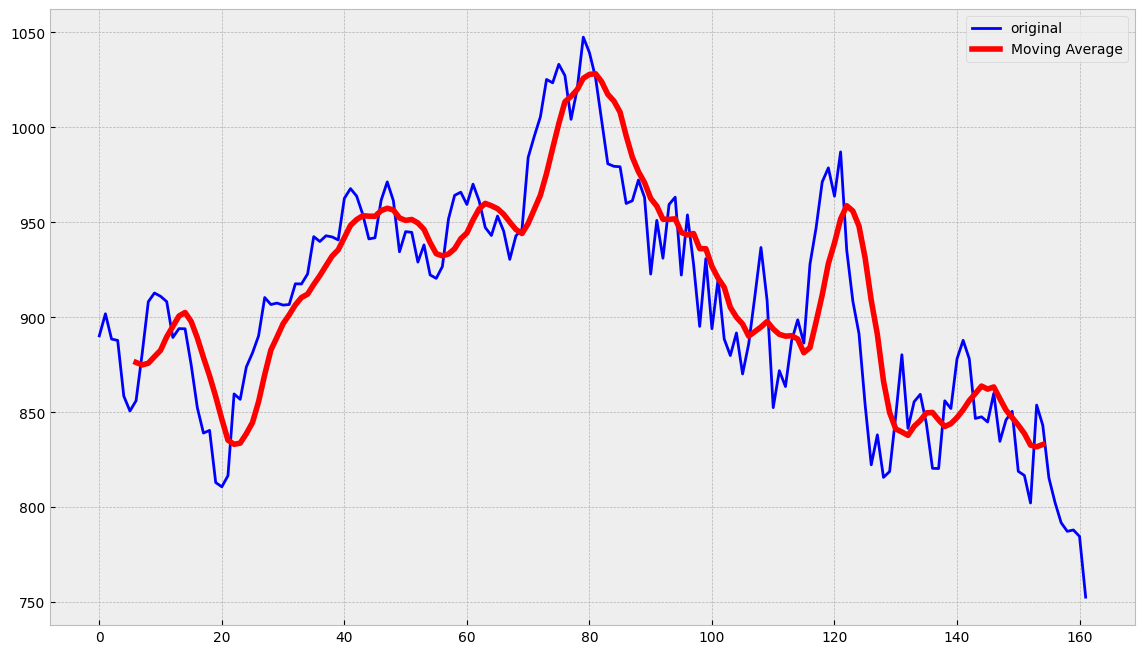

In [109]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

train_ser, test_ser = split_train_test_preds(all_series[seria_key], 7)

ser = moving_average(train_ser, 7)
mae = mae_calc(test_ser, ser[len(ser)-7:])
mse = mse_calc(test_ser, ser[len(ser)-7:])
print(f'MAE value: {mae}')
print(f'MSE value: {mse}')

with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(all_series[seria_key], color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()
    plt.show()

MAE value: 51.76737391748347
MSE value: 3653.259385960705


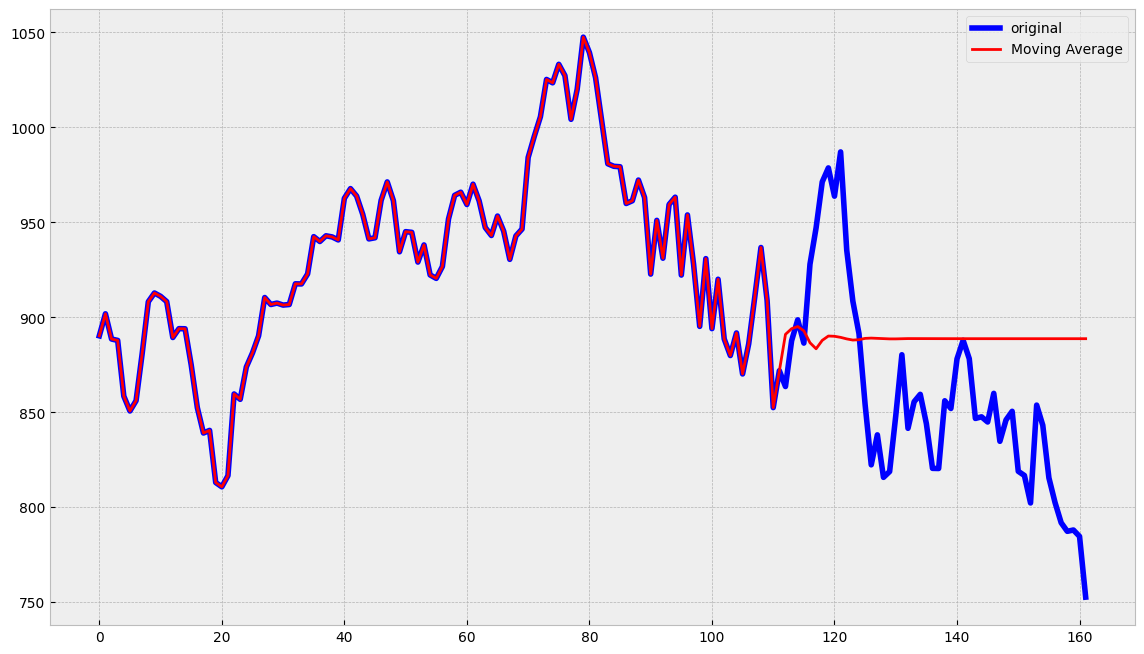

In [113]:
def predict(series, N, n_pred):
    new_series = series.copy()
    for _ in range(n_pred):
        new_series = new_series._append(pd.Series([new_series[-N:].mean()]), ignore_index=True)
    return new_series

train_ser, test_ser = split_train_test_preds(all_series[seria_key], 50)
series_pred = predict(train_ser, 7, 50)

mae = mae_calc(test_ser, series_pred[len(series_pred)-50:])
mse = mse_calc(test_ser, series_pred[len(series_pred)-50:])
print(f'MAE value: {mae}')
print(f'MSE value: {mse}')


with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(all_series[seria_key], color='blue', linewidth='4', label='original')
    plt.plot(series_pred, color='red', label='Moving Average')
    plt.legend()
    plt.show()

MAE value: 13.709027755085046
MSE value: 317.5071228079249


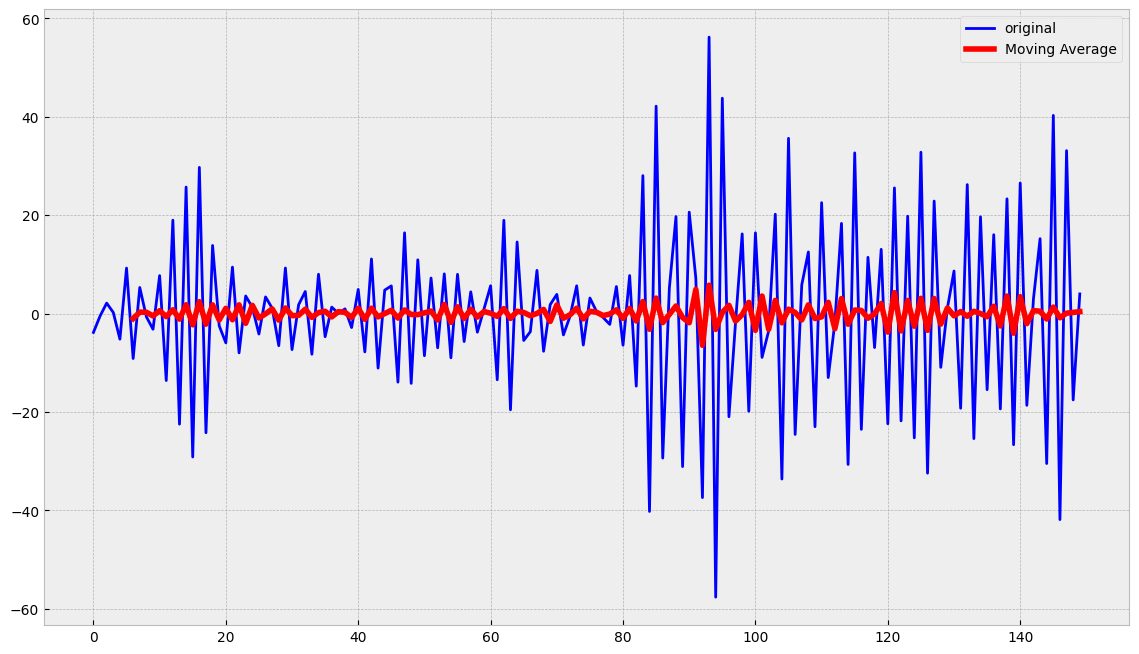

In [116]:
ser = moving_average(diff_all_series[seria_key], 7)
mae = mae_calc(diff_all_series[seria_key], ser)
mse = mse_calc(diff_all_series[seria_key], ser)
print(f'MAE value: {mae}')
print(f'MSE value: {mse}')

with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(diff_all_series[seria_key], color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()
    plt.show()

MAE value: 20.11937928700448
MSE value: 506.43179089263606


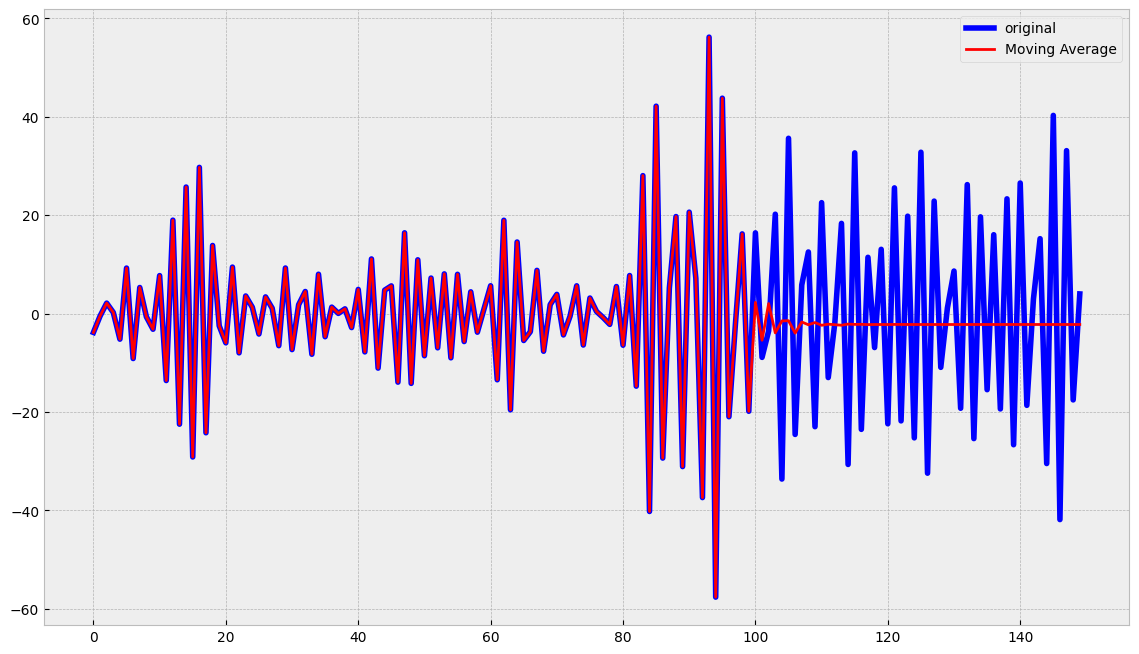

In [124]:
train_ser, test_ser = split_train_test_preds(diff_all_series[seria_key], 50)
series_pred = predict(train_ser, 7, 50)
mae = mae_calc(test_ser, series_pred[len(series_pred)-50:])
mse = mse_calc(test_ser, series_pred[len(series_pred)-50:])
print(f'MAE value: {mae}')
print(f'MSE value: {mse}')

with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(diff_all_series[seria_key], color='blue', linewidth='4', label='original')
    plt.plot(series_pred, color='red', label='Moving Average')
    plt.legend()
    plt.show()

red
MAE value: 36.26491412476493
MSE value: 2268.942315298461
-----
green
MAE value: 29.43316448819587
MSE value: 1449.1362544874212
-----
purple
MAE value: 144.8228445247643
MSE value: 24335.257538823098
-----
black
MAE value: 303.7456129321508
MSE value: 110041.36579768686
-----


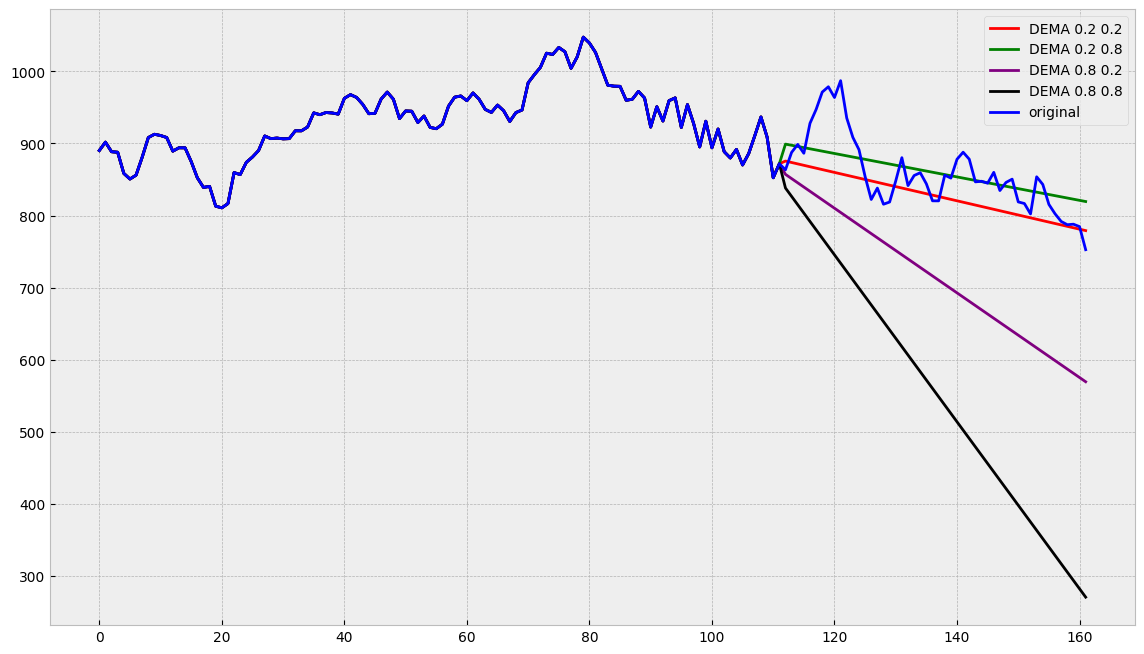

In [127]:
def double_ema_with_preds(series, alpha, beta, n_preds):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
        
    preds = []
    for n in range(n_preds):
        value = result[-1]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
        preds.append(level+trend)

    return series._append(pd.Series(preds), ignore_index=True), pd.Series(result)


alphas = [0.2,0.2,0.8,0.8]
bettas = [0.2,0.8,0.2,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    train_ser, test_ser = split_train_test_preds(all_series[seria_key], 50)
    for i in range(len(alphas)):
        ser, _ = double_ema_with_preds(train_ser, alphas[i], bettas[i], 50)
        mae = mae_calc(test_ser, ser[len(ser)-50:])
        mse = mse_calc(test_ser, ser[len(ser)-50:])
        print(colors[i])
        print(f'MAE value: {mae}')
        print(f'MSE value: {mse}')
        print("-----")
        plt.plot(ser, color=colors[i], linewidth='2', label='DEMA {} {}'.format(alphas[i], bettas[i]))
    plt.plot(all_series[seria_key], color='blue',label='original')
    plt.legend()
    plt.show()

red
MAE value: 22.001404817131984
MSE value: 727.156583388379
-----
green
MAE value: 50.941029367216814
MSE value: 3627.1420801541854
-----
purple
MAE value: 90.24181071067838
MSE value: 10350.416486498158
-----
black
MAE value: 415.6686790098865
MSE value: 221645.69760109775
-----


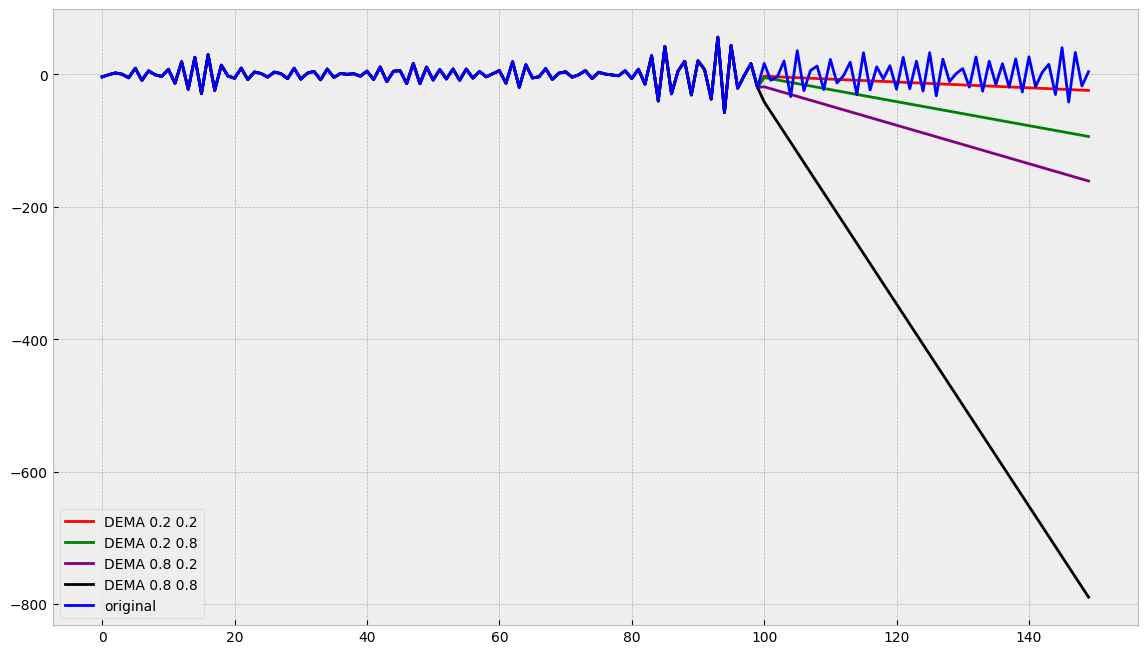

In [129]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    train_ser, test_ser = split_train_test_preds(diff_all_series[seria_key], 50)
    for i in range(len(alphas)):
        ser, _ = double_ema_with_preds(train_ser, alphas[i], bettas[i], 50)
        mae = mae_calc(test_ser, ser[len(ser)-50:])
        mse = mse_calc(test_ser, ser[len(ser)-50:])
        print(colors[i])
        print(f'MAE value: {mae}')
        print(f'MSE value: {mse}')
        print("-----")
        plt.plot(ser, color=colors[i], linewidth='2', label='DEMA {} {}'.format(alphas[i], bettas[i]))
    plt.plot(diff_all_series[seria_key], color='blue',label='original')
    plt.legend()
    plt.show()

MAE value: 45.89402267749732
MSE value: 4325.314808667821


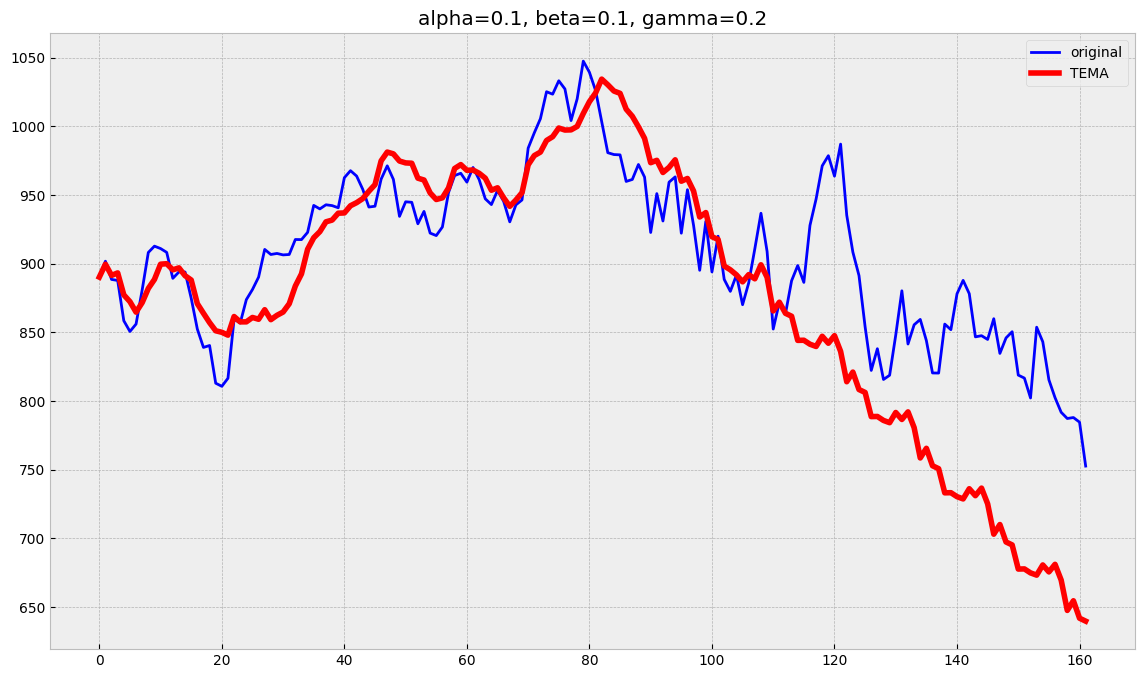

In [81]:



def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

def plot_tema(alpha, beta, gamma, ser, ser_to_plot, n_preds=24):
    train_ser, test_ser = split_train_test_preds(ser, n_preds)
    tema = triple_exponential_smoothing(train_ser, 12, alpha, beta, gamma, n_preds)
    mae = mae_calc(ser, tema)
    mse = mse_calc(ser, tema)
    print(f'MAE value: {mae}')
    print(f'MSE value: {mse}')
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()
        plt.show()

plot_tema(0.1, 0.1, 0.2, all_series[seria_key], all_series[seria_key], 50)